In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

In [9]:
# IMPORTING DATA  
df = pd.read_csv('C:/Users/HP/Desktop/fraud-detection/algo/dataset/PS_20174392719_1491204439457_log.csv')
#df.drop('Time', axis = 1, inplace = True)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
df=df.iloc[:,1:]
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
cases = len(df)
nonfraud_count = len(df[df.isFraud == 0])
fraud_count = len(df[df.isFraud == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 6362620
Number of Non-fraud cases are 6354407
Number of fraud cases are 8213
Percentage of fraud cases is 0.13
--------------------------------------------


ALGO Test Random Forest 

In [6]:
# dividing the X and the Y from the dataset
X = df.drop(['isFraud'], axis = 1)
Y = df["isFraud"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(16426, 12)
(16426,)


In [7]:
import seaborn as sns
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [8]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2, random_state = 42)


In [9]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)


RandomForestClassifier()

In [10]:
# predictions
yPred = rfc.predict(xTest)

In [11]:
#n_outliers = len(fraud)

n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))
  
rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))
  
f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9945222154595252
The precision is 0.9903089036947305
The recall is 0.9987782529016493
The F1-Score is 0.9945255474452555
The Matthews correlation coefficient is0.9890805323836558


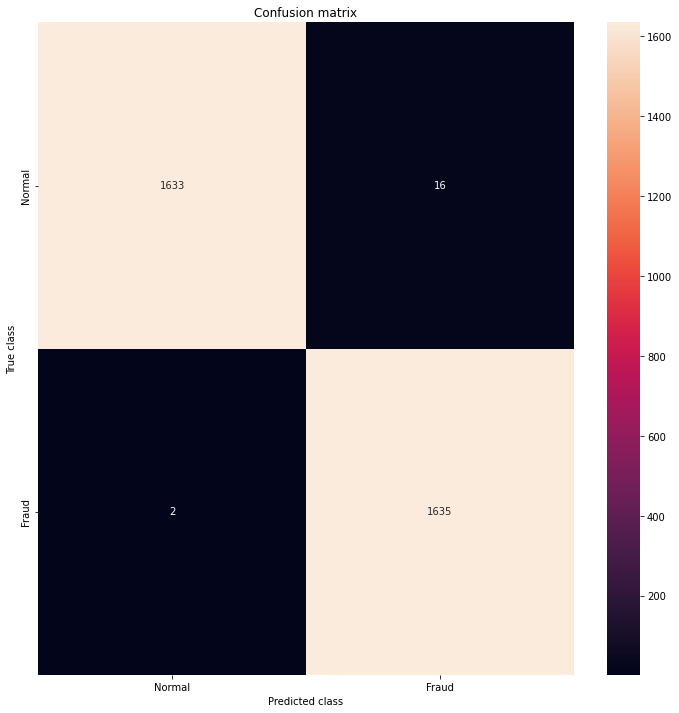

In [12]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [13]:
# Afficher les résultats
#print("Prédictions:", yPred)

anomalies = np.where(yPred == 1)
print("Anomalies:", anomalies)

Anomalies: (array([   0,    1,    6, ..., 3282, 3283, 3284], dtype=int64),)


In [14]:
# Manual chec
j=0
for val in yPred:
    if val==1:
        print(str(j)+" ",val)
    j=j+1

    #print(df.iloc[index])

0  1
1  1
6  1
8  1
9  1
11  1
12  1
15  1
17  1
18  1
19  1
20  1
21  1
23  1
24  1
33  1
35  1
36  1
37  1
39  1
40  1
41  1
42  1
43  1
45  1
46  1
49  1
54  1
55  1
57  1
59  1
60  1
61  1
64  1
68  1
71  1
73  1
74  1
75  1
76  1
79  1
81  1
83  1
84  1
85  1
86  1
94  1
95  1
105  1
106  1
107  1
111  1
113  1
115  1
116  1
117  1
118  1
119  1
121  1
122  1
126  1
128  1
130  1
131  1
132  1
133  1
134  1
135  1
143  1
144  1
148  1
149  1
150  1
153  1
157  1
158  1
161  1
162  1
163  1
164  1
165  1
171  1
175  1
177  1
179  1
185  1
187  1
188  1
189  1
190  1
193  1
194  1
195  1
198  1
199  1
203  1
204  1
206  1
207  1
211  1
212  1
213  1
214  1
216  1
219  1
220  1
224  1
226  1
228  1
229  1
233  1
234  1
236  1
238  1
242  1
245  1
247  1
248  1
249  1
250  1
251  1
253  1
256  1
257  1
258  1
259  1
260  1
265  1
266  1
267  1
270  1
271  1
278  1
280  1
281  1
283  1
289  1
291  1
293  1
294  1
295  1
298  1
300  1
302  1
306  1
307  1
308  1
310  1
312  1
315  1
316

In [15]:
import joblib

# save
joblib.dump(rfc, "./random_forest.joblib")

['./random_forest.joblib']

In [16]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("./random_forest.joblib")

In [21]:
test=[139,265803.35,0.00,0.00,751669.39,1017472.74, 0 , 1,0,0,0 ,0 ]
test1=[319,1033878.67,1033878.67,0.0,0.0,0.0,0,0,0,0,1,0]

In [22]:
to_predict = np.array(test1).reshape(1,12)
to_predict

array([[3.19000000e+02, 1.03387867e+06, 1.03387867e+06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [23]:
loaded_rf.predict(to_predict) 

array([1], dtype=int64)

In [20]:
import pickle

#serializing our model to a file called model.pkl
pickle.dump(rfc, open("model.pkl","wb"))